In [ ]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
def binary(img, threshold):
    gray = rgb2gray(img)*255
    bin_img = 255*(gray > threshold)
    return bin_img

In [ ]:
def erode_dilate(bin_img, se=np.ones((3,3)).astype(np.bool),flag=0):
    rows, cols = bin_img.shape
    eroded_shape = (
        rows + (se.shape[0]//2 )*2,
        cols + (se.shape[1]//2 )*2
    )
    if flag == 1:
        input_img = np.ones(eroded_shape).astype(np.bool)
    else :
        input_img = np.zeros(eroded_shape).astype(np.bool)
    input_img[se.shape[0]//2:rows+se.shape[0]//2, se.shape[1]//2:cols+se.shape[1]//2] = bin_img.astype(np.bool)

    se = se.astype(np.bool)
    res_img = np.zeros(eroded_shape).astype(np.bool)

    return (res_img, input_img)

In [ ]:
def erode(bin_img, se=np.ones((3,3)).astype(np.bool)):
    rows, cols = bin_img.shape
    se_rows, se_cols = se.shape
    eroded_img, input_img = erode_dilate(bin_img, se,1)

    for row in range(rows):
        for col in range(cols):
            eroded_img[row, col] = np.min(input_img[row:row+se_rows, col:col+se_cols][se])
    
    return eroded_img[0:rows,0:cols]

In [ ]:
def dilate(bin_img, se=np.ones((3,3)).astype(np.bool)):
    rows, cols = bin_img.shape
    se_rows, se_cols = se.shape
    dilated_img, input_img = erode_dilate(bin_img, se,0)

    for row in range(rows):
        for col in range(cols):
            dilated_img[row, col] = np.max(input_img[row:row+se_rows, col:col+se_cols][se])
    
    return dilated_img[0:rows, 0:cols]

In [ ]:
img = binary(io.imread('dataset/test.png'), 230)*255
showHist(img)
img = 255 - img

horizontal = np.copy(img)
cols = horizontal.shape[1]
horizontal_size = cols//15
horizontal_se = np.ones((1, horizontal_size)).astype(np.bool)
# horizontal_se = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])
horizontal = erode(horizontal, horizontal_se)
horizontal = dilate(horizontal, horizontal_se)
show_images([img, horizontal])

In [ ]:
vertical = np.copy(img)
rows = vertical.shape[0]
vertical_size = rows//15
vertical_se = np.ones((vertical_size, 1)).astype(np.bool)
vertical = erode(vertical, vertical_se)
vertical = dilate(vertical, vertical_se)
# vertical = 255 - vertical
show_images([vertical])

In [ ]:
def horizontal_projection(img):
    projected = []
    rows, cols = img.shape
    for i in range(rows):
        proj_sum = 0
        for j in range(cols):
            proj_sum += img[i][j] == 255
        projected.append([255]*proj_sum + [0]*(cols-proj_sum))
    return projected
def crop(img):
    max_ones = 0
    for row in img:
        row_sum = np.sum(row) / 255
        max_ones = np.max(max_ones, row_sum)
    step = max_ones//3
    start = max_ones - step
    cropped = img[:]
    print(cropped)
    for i in range(len(cropped)):
        cropped = cropped[i][start:start+step]
    cropped = np.array(cropped, dtype=np.uint8)
    return cropped
def find_white_rows(img):
    white_rows = []
    rows, cols = img.shape
    for row in range(rows):
        for col in range(cols):
            if img[row][col] == 255 and row not in white_rows:
                white_rows.append(row)
    return sorted(white_rows)

img = io.imread('dataset/note2.png')
if len(img.shape) == 3:
    img = rgb2gray(img)*255
else:
    img = rgb2gray(img)
bin_img = img
original = 255*(img > 230)
img = 255 - original
bin_img = img
show_images([img])
se = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
for i in range(10):
    img = dilate(img, se)
show_images([img])


In [ ]:
from skimage.measure import find_contours
from skimage.draw import rectangle
contours = find_contours(img, 0.8)
contours_count = 0
line_count = 0
for contour in contours:
    contours_count += 1
    [Xmin, Xmax, Ymin, Ymax] = [int(np.min(contour[:, 1])), int(np.max(contour[:, 1])), int(np.min(contour[:, 0])), int(np.max(contour[:, 0]))]
    if (Xmax - Xmin) < 40 or (Ymax - Ymin) < 40:
        continue
    horizontal_proj = np.zeros(int(Ymax)+1)
    for i in range(int(Ymin), int(Ymax)):
        for j in range(img = io.imread('dataset/note2.png')
if len(img.shape) == 3:
    img = rgb2gray(img)*255
else:
    img = rgb2gray(img)
bin_img = img
original = 255*(img > 230)
img = 255 - originalint(Xmin), int(Xmax)):
            if original[i][j] == 0:
                horizontal_proj[i] = horizontal_proj[i] + 1
    i = Ymin
    count = 0
    lines = []
    while i < Ymax:
        while i < Ymax and horizontal_proj[i] <= 10:
            i = i + 1
        start = i
        while i < Ymax and horizontal_proj[i] > 10:
            i = i + 1
        end = i
        if end - start >= 15:
            count = count + 1
            if count%2 == 1:
                lines.append(((Xmin, start), (Xmax, end)))
                if contours_count == 0:
                    line_count = line_count + 1
                rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax, Xmax), shape=original.shape)
                rr = np.array(rr,dtype='int')
                cc = np.array(cc,dtype='int')
                img[rr, cc] = 0
show_images([img])

In [ ]:
from skimage.measure import label, regionprops
from skimage.color import label2rgb

show_images([bin_img])
staves = bin_img
sz = 45
horz_se = np.ones((1, sz)).astype(np.bool)
vert_se = np.ones((sz, 1)).astype(np.bool)
mat_se = np.ones((sz, sz)).astype(np.bool)
# print(vert_se, horz_se)
staves = dilate(staves, vert_se)
staves = erode(staves, horz_se)

staff_regions = label(staves)
label_overlay = label2rgb(staff_regions, image=bin_img, bg_label=0)
show_images([label_overlay])

In [ ]:
def vert_proj(img):
    rows, cols = img.shape
    count = 0
    hist = []
    for i in range(cols):
        for j in range(rows):
           count = count + (img[i][j] != 1)
        hist.append(count)
        count = 0

In [ ]:
def remove_staff(img, idx):
    rows, cols = img.shape
    for i in range(cols):
        if img[idx][i] == 0:
            total = 0
            for j in range(-3, 4):
                if idx+j > 0 and idx + j < rows:
                    total += img[idx+j][i]
            if total > 1000:
                for j in range(-2, 3):
                    if idx+j > 0 and idx + j < rows:
                        img[idx+j][i] = 255
    return img

In [ ]:
from skimage.measure import find_contours
from skimage.draw import rectangle
from matplotlib.pyplot import imshow

original_img = io.imread('dataset/note2.png')

gray_img = np.copy(original_img)
if len(gray_img.shape) == 3:
    gray_img = rgb2gray(gray_img)*255
else:
    gray_img = rgb2gray(gray_img)

bin_img = 255*(gray_img > 240)
show_images([bin_img], ['Binary'])

horiz_projection = horiz_proj(bin_img)
# vert_projection = vert_proj(bin_img)

staff = []
max_horiz_proj = np.max(horiz_projection)
for i in range(len(horiz_projection)):
    if horiz_projection[i] > max_horiz_proj/8:
        bin_img = remove_staff(bin_img, i)
show_images([bin_img], ['After removing staves'])

t_bin = np.copy(bin_img)
contours = find_contours(t_bin, 0.8)
bounding_boxes = []
for contour in contours:
    box = [np.min(contour[:, 1]), np.max(contour[:, 1]), np.min(contour[:, 0]), np.max(contour[:, 0])]
    bounding_boxes.append(box)

symbols = []
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=t_bin.shape)
    rr = np.array(rr,dtype='int')
    cc = np.array(cc,dtype='int')
    is_note = Xmin > 10 and (Ymax - Ymin) / (Xmax - Xmin) < 15
    if not is_note:
        continue
    symbol = t_bin[rr, cc]
    symbols.append(symbol)
    t_bin[rr, cc] = 0
# for symbol in symbols:
#     show_images([symbol])
show_images([t_bin])



In [47]:
from skimage.measure import find_contours
from skimage.draw import rectangle

In [85]:
def get_boxes(contours):
    bounding_boxes = []
    for contour in contours:
        box = [np.min(contour[:, 1]), np.max(contour[:, 1]), np.min(contour[:, 0]), np.max(contour[:, 0])]
        bounding_boxes.append(box)
    return bounding_boxes
def h_proj(bin_img, box):
    [Xmin, Xmax, Ymin, Ymax] = [int(i) for i in box]
    h_hist = np.zeros(Ymax+1)
    for i in range(Ymin, Ymax):
        for j in range(Xmin, Xmax):
            if bin_img[i][j] == 0:
                h_hist[i] = h_hist[i]+1
    return h_hist

In [124]:
def get_lines(img):
    original = np.copy(img)
    show_images([original], ['Original'])

    thresh = 250
    bin_img = 255*(img > thresh)
    inv_bin = 255 - bin_img
    show_images([bin_img, inv_bin], ['Binary', 'Inverse'])

    lines = []
    cross = np.array([[0,1,0],[1, 1, 1], [0,1,0]])
    for i in range(10):
        dilated = dilate(img, cross)
    show_images([dilated], ['Dilated'])

    contours = find_contours(dilated, 0.8)
    bounding_boxes = get_boxes(contours)

    count_contours = 0
    count_stanza_line = 0

    for box in bounding_boxes:
        count_contours += 1
        Xmin, Xmax, Ymin, Ymax = [int(i) for i in box]

        # if (Xmax - Xmin) < 10 or (Ymax - Ymin) < 10:
        #     continue

        h_hist = h_proj(bin_img, box)
        print(h_hist)
        
        idx = Ymin
        limit = 10
        consec_peaks = 15
        count = 0
        while idx < Ymax:
            while idx < Ymax and h_hist[idx] <= limit:
                idx = idx + 1
            start = idx
            while idx < Ymax and h_hist[idx] > limit:
                idx = idx + 1
            end = idx

            if (end - start) >= consec_peaks:
                print("Bounding")
                count += 1
                if count%2 == 1:
                    lines.append(((Xmin, start), (Xmax, end)))
                    if count_contours == 0:
                        count_stanza_line += 1
                    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=original.shape)
                    rr = np.array(rr,dtype='int')
                    cc = np.array(cc,dtype='int')
                    original[rr, cc] = 1
                    print(rr, cc)
    show_images([img], ['After Boundary Boxes'])
    print(lines)
    print(count_stanza_line)

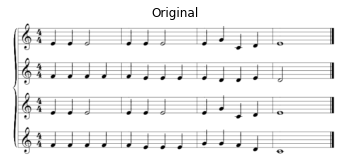

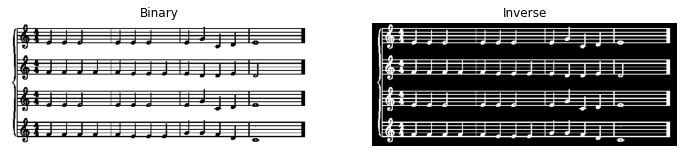

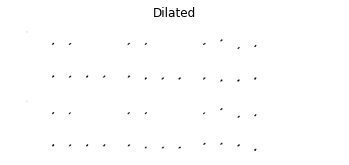

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 5. 5. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 5. 5. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 5. 5. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

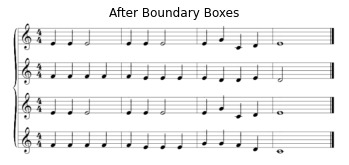

[]
0


In [125]:
img = io.imread('dataset/note2.png')
if len(img.shape) == 3:
    img = rgb2gray(img)*255
else:
    img = rgb2gray(img)
get_lines(img)
# bin_img = img
# original = 255*(img > 230)
# img = 255 - original
# show_images([img])

In [174]:
from collections import Counter

def horiz_proj(img):
    rows, cols = img.shape
    hist = []
    for i in range(rows):
        count = 0
        for j in range(cols):
            count = count + (img[i][j] != 1)
        hist.append(count)
    return hist

def rle_append(count, rle_type, rle_col, rle_white, rle_black):
    rle_col.append(count)
    if rle_type == 0:
        rle_black.append(count)
    else:
        rle_white.append(count)
    return rle_col, rle_white, rle_black
def col_rle(bin_img):
    # rows, cols = bin_img.shape
    # white = []
    # black = []
    # bw = []
    # for i in range(cols):
    #     col = bin_img[:, i]
    #     rle_white = []
    #     rle_black = []
    #     rle_col = []
    #     count = 0
    #     rle_type = col[0]
    #     for j in range(rows):
    #         if col[j] == rle_type:
    #             count += 1
    #         else:
    #             rle_col, rle_white, rle_black = rle_append(count, rle_type, rle_col, rle_white, rle_black)
    #             rle_type = col[j]
    #             count = 1
        
    #     rle_col, rle_white, rle_black = rle_append(count, rle_type, rle_col, rle_white, rle_black)
    #     rle_bw = [sum(rle_col[i: i+2]) for i in range(len(rle_col))]

    #     bw.extend(rle_bw)
    #     white.extend(rle_white)
    #     black.extend(rle_black)
    # white = Counter(white)
    # black = Counter(black)
    # bw = Counter(bw)

    # staff_spacing = white.most_common(1)[0][0]
    # staff_width = black.most_common(1)[0][0]
    # total = bw.most_common(1)[0][0]

    # assert (staff_spacing + staff_width == total), "Sum is not corresponding to total"

    # return staff_width, staff_spacing

    num_rows = img.shape[0]  # Image Height (number of rows)
    num_cols = img.shape[1]  # Image Width (number of columns)
    rle_image_white_runs = []  # Cumulative white run list
    rle_image_black_runs = []  # Cumulative black run list
    sum_all_consec_runs = []  # Cumulative consecutive black white runs

    for i in range(num_cols):
        col = img[:, i]
        rle_col = []
        rle_white_runs = []
        rle_black_runs = []
        run_val = 0  # (The number of consecutive pixels of same value)
        run_type = col[0]  # Should be 255 (white) initially
        for j in range(num_rows):
            if (col[j] == run_type):
                # increment run length
                run_val += 1
            else:
                # add previous run length to rle encoding
                rle_col.append(run_val)
                if (run_type == 0):
                    rle_black_runs.append(run_val)
                else:
                    rle_white_runs.append(run_val)

                # alternate run type
                run_type = col[j]
                # increment run_val for new value
                run_val = 1

        # add final run length to encoding
        rle_col.append(run_val)
        if (run_type == 0):
            rle_black_runs.append(run_val)
        else:
            rle_white_runs.append(run_val)

        # Calculate sum of consecutive vertical runs
        sum_rle_col = [sum(rle_col[i: i + 2]) for i in range(len(rle_col))]

        # Add to column accumulation list
        rle_image_white_runs.extend(rle_white_runs)
        rle_image_black_runs.extend(rle_black_runs)
        sum_all_consec_runs.extend(sum_rle_col)

    white_runs = Counter(rle_image_white_runs)
    black_runs = Counter(rle_image_black_runs)
    black_white_sum = Counter(sum_all_consec_runs)

    line_spacing = white_runs.most_common(1)[0][0]
    line_width = black_runs.most_common(1)[0][0]
    width_spacing_sum = black_white_sum.most_common(1)[0][0]

    assert (line_spacing + line_width == width_spacing_sum), "Estimated Line Thickness + Spacing doesn't correspond with Most Common Sum "

    return line_width, line_spacing

# def find_row_staves(img, staff_width, staff_spacing):
#     rows, cols = img.shape
#     h_hist = horiz_proj(img)
#     staves = []
#     staff_block_size = 5
#     staff_length = staff_block_size * (staff_width + staff_spacing) - staff_spacing
#     staff_range = rows - staff_length + 1

#     row = 0
#     while row < staff_range:
#         lines = [h_hist[j: j + staff_width] for j in range(row, row + (staff_block_size-1) * (staff_width+staff_spacing) + 1, (staff_spacing+staff_width))]
#         avg = sum(sum(lines, [])) / (staff_block_size * staff_width)

#         for line in lines:
#             if sum(line) / staff_width < 0.4 * cols:
#                 row += 1
#                 break
#             else:
#                 staff_row = [list(range(j, j+staff_width)) for j in range(row, row + (staff_block_size - 1) * (staff_width + staff_spacing) + 1, (staff_width + staff_spacing))]
#                 staves.append(staff_row)
#                 row += staff_length
#     return staves
# def find_col_staves(img, staff_width, staff_spacing, row_staves):
#     rows, cols = img.shape
#     staves = []

#     for i in range(len(row_staves)):
#         all_starts = []
#         all_ends = []
#         start = 0
#         end = cols - 1
#         for j in range(cols // 2):
#             row = img[row_staves[i][0][0]:row_staves[i][4][staff_width - 1], j]
#             black_count = len(list(filter(lambda x : x == 0, row)))
#             if black_count == 0:
#                 all_starts.append(j)
        
#         list.sort(all_starts, reverse=True)
#         start = all_starts[0]

#         for j in range(cols // 2):
#             row = img[row_staves[i][0][0]:row_staves[i][4][staff_width - 1], j]
#             black_count = len(list(filter(lambda x : x == 0, row)))
#             if black_count == 0:
#                 all_ends.append(j)
        
#         list.sort(all_ends, reverse=True)
#         end = all_ends[0]

#         staves.append((start, end))
#     return staves

In [183]:
def find_staffline_rows(img, line_width, line_spacing):
    num_rows = img.shape[0]  # Image Height (number of rows)
    num_cols = img.shape[1]  # Image Width (number of columns)
    row_black_pixel_histogram = []

    # Determine number of black pixels in each row
    for i in range(num_rows):
        row = img[i]
        num_black_pixels = 0
        for j in range(len(row)):
            if (row[j] == 0):
                num_black_pixels += 1

        row_black_pixel_histogram.append(num_black_pixels)

    all_staff_row_indices = []
    num_stafflines = 5
    threshold = 0.4
    staff_length = num_stafflines * (line_width + line_spacing) - line_spacing
    iter_range = num_rows - staff_length + 1

    current_row = 0
    while (current_row < iter_range):
        staff_lines = [row_black_pixel_histogram[j: j + line_width] for j in
                       range(current_row, current_row + (num_stafflines - 1) * (line_width + line_spacing) + 1,
                             line_width + line_spacing)]
        pixel_avg = sum(sum(staff_lines, [])) / (num_stafflines * line_width)

        for line in staff_lines:
            if (sum(line) / line_width < threshold * num_cols):
                current_row += 1
                break
        else:
            staff_row_indices = [list(range(j, j + line_width)) for j in
                                 range(current_row,
                                       current_row + (num_stafflines - 1) * (line_width + line_spacing) + 1,
                                       line_width + line_spacing)]
            all_staff_row_indices.append(staff_row_indices)
            current_row = current_row + staff_length

    return all_staff_row_indices


def find_staffline_columns(img, all_staffline_vertical_indices, line_width, line_spacing):
    num_rows = img.shape[0]  # Image Height (number of rows)
    num_cols = img.shape[1]  # Image Width (number of columns)
    all_staff_extremes = []

    # Find start of staff for every staff in piece
    for i in range(len(all_staffline_vertical_indices)):
        begin_list = [] # Stores possible beginning column indices for staff
        end_list = []   # Stores possible end column indices for staff
        begin = 0
        end = num_cols - 1

        # Find staff beginning
        for j in range(num_cols // 2):
            first_staff_rows_isolated = img[all_staffline_vertical_indices[i][0][0]:all_staffline_vertical_indices[i][4][
                line_width - 1], j]
            num_black_pixels = len(list(filter(lambda x: x == 0, first_staff_rows_isolated)))

            if (num_black_pixels == 0):
                begin_list.append(j)

        list.sort(begin_list, reverse=True)
        begin = begin_list[0]

        # Find staff beginning
        for j in range(num_cols // 2, num_cols):
            first_staff_rows_isolated = img[all_staffline_vertical_indices[i][0][0]:all_staffline_vertical_indices[i][4][
                line_width - 1], j]
            num_black_pixels = len(list(filter(lambda x: x == 0, first_staff_rows_isolated)))

            if (num_black_pixels == 0):
                end_list.append(j)

        list.sort(end_list)
        end = end_list[0]

        staff_extremes = (begin, end)
        all_staff_extremes.append(staff_extremes)

    return all_staff_extremes

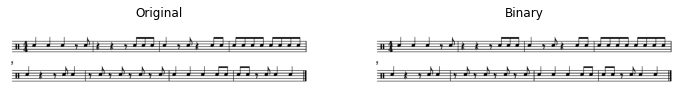

(318, 10, 1, 33)
(313, 78, 8, 33)
(318, 146, 1, 33)
(314, 213, 7, 33)


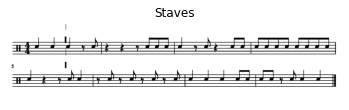

In [185]:
img = io.imread('dataset/note2.png')
bin_img = np.copy(img)
if len(img.shape) == 3:
    img = rgb2gray(img)*255
    bin_img = 1.0*(img > 250)
else:
    img = rgb2gray(img)
    bin_img = 1.0*(img > 0.9)
img = bin_img
show_images([img, bin_img], ['Original', 'Binary'])

line_width, line_spacing = col_rle(bin_img)
all_staffline_vertical_indices = find_staffline_rows(bin_img, line_width, line_spacing)
all_staffline_horizontal_indices = find_staffline_columns(bin_img, all_staffline_vertical_indices, line_width, line_spacing)



staffs = []
half_dist_between_staffs = (all_staffline_vertical_indices[1][0][0] - all_staffline_vertical_indices[0][4][line_width - 1])//2

for i in range(len(all_staffline_vertical_indices)):
    # Create Bounding Box
    x = all_staffline_horizontal_indices[i][0]
    y = all_staffline_vertical_indices[i][0][0]
    width = all_staffline_horizontal_indices[i][1] - x
    height = all_staffline_vertical_indices[i][4][line_width - 1] - y
    staff_box = (x, y, width, height)

    # Create Cropped Staff Image
    staff_img = img[max(0, y - half_dist_between_staffs): min(y+ height + half_dist_between_staffs, img.shape[0] - 1), x:x+width]

    # Normalize Staff line Numbers to Cropped Image
    pixel = half_dist_between_staffs
    normalized_staff_line_vertical_indices = []

    for j in range(5):
        line = []
        for k in range(line_width):
            line.append(pixel)
            pixel += 1
        normalized_staff_line_vertical_indices.append(line)
        pixel += line_spacing + 1

    staff = (normalized_staff_line_vertical_indices, staff_box, line_width, line_spacing, staff_img)
    staffs.append(staff)


# staves = []
# step = (staves_vertical_indices[1][0][0] - staves_vertical_indices[0][4][staff_width - 1])//2
# for i in range(len(staves_vertical_indices)):
#     x = staves_horizontal_indices[i][0]
#     width = staves_horizontal_indices[i][1] - x

#     y = staves_vertical_indices[i][0][0]
#     height = staves_vertical_indices[i][4][staff_width-1] - y

#     staff_img = img[max(0, y - step): min(y+step+height, img.shape[0] - 1), x: x+width]

#     box = (x, y, width, height)
#     pixel = step
#     normalized_vert_staves = []
#     for j in range(5):
#         line = []
#         for k in range(staff_width):
#             line.append(pixel)
#             pixel += 1
#         normalized_vert_staves.append(line)
#         pixel += staff_spacing + 1
    
#     staves.append((normalized_vert_staves, box, staff_width, staff_spacing, staff_img))

staved_img = img.copy()
for staff in staves:
    _, box, _, _, _ = staff
    print(box)
    Xmin, Ymin, width, height = box
    Xmax = Xmin + width
    Ymax = Ymin + height
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=staved_img.shape)
    # rr = np.array(rr,dtype='int')
    # cc = np.array(cc,dtype='int')
    staved_img[rr, cc] = 0
    

show_images([staved_img], ['Staves'])